In [1]:
from SvmModel import Model

In [2]:
model = Model("data_transformed.csv",
        "data_transformed.csv")

In [3]:
from Hyperoptsvm import controller

In [4]:
hyperCl = controller(model)
hyperparams = hyperCl.optimize_hyperparam()

0.6984886458570669                                                                                                     
0.6984886458570669                                                                                                     
0.5989974937343359                                                                                                     
0.6992481203007519                                                                                                     
0.6992481203007519                                                                                                     
0.5088638883366223                                                                                                     
0.6992481203007519                                                                                                     
0.4029850746268657                                                                                                     
0.6992481203007519                      

In [5]:
print(hyperparams)

{'C': 1.7718619582441852, 'coef0': 1.6216340381955197, 'degree': 8.0, 'gamma': 'scale', 'kernel': 'poly'}


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# import data
data_transformed = pd.read_csv('data_transformed.csv')

# avoid this ugly slicing by using a two-dim dataset
X = data_transformed.iloc[:,:-1]
y = data_transformed.iloc[:,:]['Class']


# using 75% of the data for training and 30% for testing (with stratification for imbalanced class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify= y, random_state = 123)

#Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [8]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve


class Test:
    """
    A class to represent trains the model on best paramters and
    evaluate SVM model

    """

    def __init__(self, hyperparams, scaled_X_train, scaled_X_test, y_train):
        self.clf = svm.SVC(**hyperparams, class_weight='balanced', random_state=123, probability=True)
        self.clf.fit(scaled_X_train, y_train)
        self.pred = self.clf.predict(scaled_X_test)

    def score(self, y_test):
        # Compute confusion matrix, roc_auc_score, Cohen_kappa_score

        performance = {"confusion_matrix": confusion_matrix(y_test, self.pred),
                  "roc_auc_score": roc_auc_score(y_test, self.pred),
                  "cohen_score": cohen_kappa_score(y_test, self.pred)}
        return performance
    
    def roc(self):
        clf =self.clf
        svc_disp = plot_roc_curve(clf, scaled_X_test , y_test)
        svc_disp.ax_.set_xlabel('False Positive Rate')
        svc_disp.ax_.set_ylabel('True Positive Rate')
        svc_disp.ax_.set_title('ROC curve')
        plt.show()
        plt.savefig('roc.png')
        
    def prcurve(self):
        clf =self.clf
        y_score = clf.decision_function(scaled_X_test)
        average_precision = average_precision_score(y_test, y_score)
        disp = plot_precision_recall_curve(clf,scaled_X_test, y_test)
        disp.ax_.set_xlabel('Recall')
        disp.ax_.set_ylabel('Precision')
        disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
        plt.show()
        plt.savefig('prcurve.png')

In [9]:
testing = Test(
    hyperparams=hyperparams,
    scaled_X_train=scaled_X_train,
    scaled_X_test=scaled_X_test,
    y_train=y_train)

print(testing.score(y_test=y_test))

{'confusion_matrix': array([[84349,    92],
       [   34,   113]], dtype=int64), 'roc_auc_score': 0.8838089824340579, 'cohen_score': 0.6413194194147505}


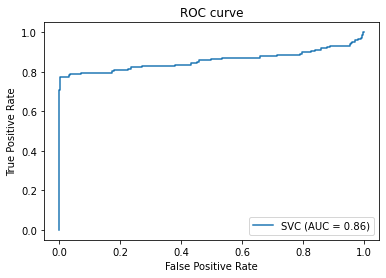

<Figure size 432x288 with 0 Axes>

In [10]:
testing.roc()

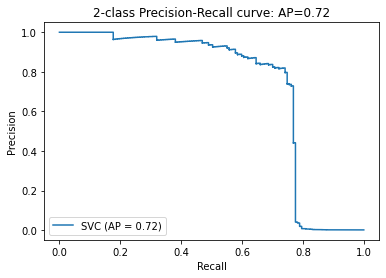

<Figure size 432x288 with 0 Axes>

In [11]:
testing.prcurve()